# untitled1

In [1]:
from numpy import array, exp, random, dot

前边三个人和小强去没去情况

In [2]:
X = array([[0,0,1],[1,1,1],[1,0,1],[0,1,1]])
y = array([[0,1,1,0]]).T

初始化权重，做个假设

In [3]:
random.seed(1)

In [4]:
# random.random():生成三行每行一个的数据，返回范围中的下一个随机浮动点数 [0.0， 1.0)
weights = 2 * random.random((3,1)) - 1

In [5]:
for it in range(10000):
  # 使用sigmod激活函数
  output = 1/(1+exp(-dot(X, weights)))  # 算出来去还是不去  
  error = y - output  # 得到一个误差 
  delta = error * output * (1-output) # 获得一个增量delta
  weights += dot(X.T, delta) # 根据增量调整假设

打印出来系数

In [6]:
print(weights)

[[ 9.67299303]
 [-0.2078435 ]
 [-4.62963669]]


In [7]:
print(1/(1+exp(-dot([[1,0,0]], weights))))

[[0.99993704]]


In [8]:
print(1/(1+exp(-dot([[0,0,1]], weights))))

[[0.009664]]


使用第二组数据

In [9]:
X = array([[1,0,1],[1,1,1],[0,0,1],[0,1,0]])
y = array([[1,1,1,0]]).T

In [10]:
random.seed(1)
weights = 2 * random.random((3,1)) - 1
for it in range(10000):
  output = 1/(1+exp(-dot(X, weights)))  # 算出来去还是不去  
  error = y - output  # 得到一个误差 
  delta = error * output * (1-output) # 获得一个增量delta
  weights += dot(X.T, delta) # 根据增量调整假设
print(weights)

[[ 3.90918963]
 [-4.61128605]
 [ 5.69653069]]


# untitled2

In [11]:
from numpy import random, dot, exp, array

加载数据

In [12]:
X = array([[0,0,1],[1,1,1],[1,0,1],[0,1,1]])
y = array([[0,1,1,0]]).T

初始化权重

In [13]:
random.seed(1)
weights = 2 * random.random((3,1)) - 1

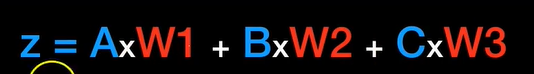

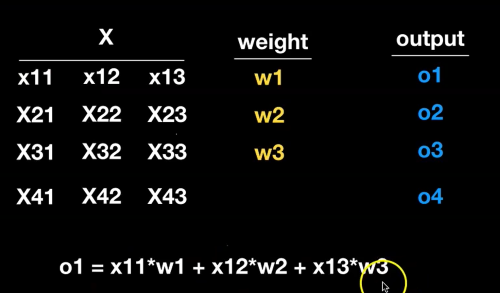

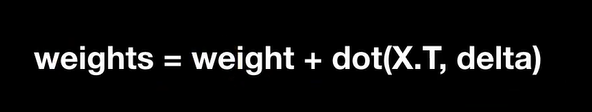

In [14]:
for it in range(10000):
  z = dot(X, weights) # X与weights相乘得到output列数据
  # print("Z:",z)
  output = 1/(1+exp(-z)) # 使用sigmod函数，计算最终output
  # print("O:",output)

  # 计算误差
  error = y - output

  # 计算斜率
  slope = output * (1-output)

  # 计算增量
  delta = error * slope

  # 更新权重
  weights = weights + dot(X.T, delta)
# print(weights)

重构

In [15]:
def fp(input):
  z = dot(input, weights) 
  return 1/(1+exp(-z)) 

In [16]:
def bp(y, output):
  # 计算误差
  error = y - output
  # 计算斜率
  slope = output * (1-output)
  # 计算增量
  return error * slope

In [17]:
for it in range(10000):
  output = fp(X)
  bp(y, output)

  # 更新权重
  weights = weights + dot(X.T, delta)
print(fp([[1,1,0]]))

[[0.99997224]]


# 多个神经元

In [18]:
X = array([[0,0,1],[0,1,1,],[1,0,1],[1,1,1]])
y = array([[0,1,1,0]]).T

In [19]:
random.seed(1)
w0 = random.random((3,4)) * 2 - 1
w1 = random.random((4,1)) * 2 - 1

In [28]:
def fp(input):
  l1 = 1/(1+exp(-dot(input, w0)))
  l2 = 1/(1+exp(-dot(l1, w1)))
  
  return l1,l2

In [27]:
def bp(l1,l2,y):
  error = y - l2
  slope = l2 * (1-l2)
  l1_delta = error * slope

  l0_slope = l1 * (1-l1)
  l0_error = l1_delta.dot(w1.T)
  l0_delta = l0_slope * l0_error
  
  return l0_delta, l1_delta

In [31]:
for it in range(1):
  l0 = X
  l1,l2 = fp(l0)
  l0_delta,l1_delta = bp(l1,l2,y)
  print(l0_delta)
  print(l1_delta)

[[ 0.01726822 -0.02229526  0.02772761 -0.00972897]
 [-0.0154265   0.02113446 -0.02592628  0.01087391]
 [-0.01615584  0.02001969 -0.01942197  0.00964382]
 [ 0.01511901 -0.02498445  0.01566774 -0.01119926]]
[[-0.11810546]
 [ 0.12769844]
 [ 0.11316304]
 [-0.13508831]]
